# ICS 635 - Assignment 3
> Derek Garcia

## Load and Scale Cross Validation Data

In [1]:
from sklearn.preprocessing import StandardScaler  
import pandas as pd

TRAINING_DATA_CSV = "data/train.csv"

training_df = pd.read_csv(TRAINING_DATA_CSV) # load csv

# split into labels (y) and features (x)
y, x = training_df.iloc[:, 0], training_df.iloc[:, 1:]

# scale features
# fit_transform on first training to learn AND apply transformation, then just transform the test - don't re-learn
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## Model Selection

In [2]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Perceptron, \
    RidgeClassifier, RidgeClassifierCV, SGDClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, \
    HistGradientBoostingClassifier, RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from logger import logger
import pandas as pd

N_FOLDS = 5

# https://www.kaggle.com/code/grigol1/all-classification-models-40-sklearn-models
MODELS = [
    AdaBoostClassifier(),
    BaggingClassifier(),
    BernoulliNB(),
    CalibratedClassifierCV(),
    DecisionTreeClassifier(),
    DummyClassifier(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
    GaussianNB(),
    GaussianProcessClassifier(),
    GradientBoostingClassifier(),
    HistGradientBoostingClassifier(),
    KNeighborsClassifier(),
    LabelPropagation(),
    LabelSpreading(),
    LinearDiscriminantAnalysis(),
    LinearSVC(),
    LogisticRegression(),
    LogisticRegressionCV(),
    MultinomialNB(),
    NearestCentroid(),
    NuSVC(),
    Perceptron(),
    QuadraticDiscriminantAnalysis(),
    RandomForestClassifier(),
    RidgeClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    SVC()
]

# init score tracker
cv_score_results = []

# cross validate all available models
for model in logger.get_data_queue(MODELS, f"cross validating models using {N_FOLDS} folds", "model"):
    try:
        avg_score = np.mean(cross_val_score(model, x_scaled, y, cv=N_FOLDS, n_jobs=-1))  # -1 means use all available cores
    except Exception:
        logger.warn(f"Failed to score '{model.__class__.__name__}'")
        continue
    cv_score_results.append({'model': model.__class__.__name__, 'avg_score': avg_score})

# return with best score at top
cv_score_df = pd.DataFrame(cv_score_results)
cv_score_df.set_index('model', inplace=True)
cv_score_df.sort_values(by='avg_score', inplace=True, ascending=False)

cv_score_df

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:   0%|                                            | 0/29 [00:00<?, ?model/s]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:   3%|█▏                                  | 1/29 [00:07<03:31,  7.54s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:   7%|██▍                                 | 2/29 [00:20<04:42, 10.46s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  10%|███▋                                | 3/29 [00:20<02:36,  6.01s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  14%|████▉                               | 4/29 [00:22<01:50,  4.44s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  17%|██████▏                             | 5/29 [00:24<01:25,  3.55s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  21%|███████▍                            | 6/29 [00:24<00:55,  2.39s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  24%|████████▋                           | 7/29 [00:25<00:37,  1.69s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  28%|█████████▉                          | 8/29 [00:31<01:06,  3.15s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  31%|███████████▏                        | 9/29 [00:31<00:44,  2.22s/model]

2025-03-10 15:30:00.778090 | WARN  | Failed to score 'GaussianProcessClassifier'
2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  34%|████████████                       | 10/29 [00:45<01:50,  5.81s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  38%|█████████████▎                     | 11/29 [01:21<04:32, 15.13s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  41%|██████████████▍                    | 12/29 [01:23<03:10, 11.18s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  45%|███████████████▋                   | 13/29 [01:26<02:15,  8.47s/model]

2025-03-10 15:30:57.176613 | WARN  | Failed to score 'LabelPropagation'
2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  48%|████████████████▉                  | 14/29 [01:41<02:39, 10.67s/model]

2025-03-10 15:31:13.540118 | WARN  | Failed to score 'LabelSpreading'
2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  52%|██████████████████                 | 15/29 [01:58<02:53, 12.36s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  55%|███████████████████▎               | 16/29 [02:00<02:00,  9.26s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  59%|████████████████████▌              | 17/29 [02:01<01:22,  6.86s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  62%|█████████████████████▋             | 18/29 [02:02<00:55,  5.05s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  66%|██████████████████████▉            | 19/29 [02:03<00:39,  3.96s/model]

2025-03-10 15:31:19.575590 | WARN  | Failed to score 'MultinomialNB'
2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  69%|████████████████████████▏          | 20/29 [02:03<00:25,  2.82s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  72%|█████████████████████████▎         | 21/29 [02:04<00:16,  2.04s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  76%|████████████████████████▎       | 22/29 [31:51<1:02:45, 537.87s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  79%|██████████████████████████▉       | 23/29 [31:52<37:40, 376.77s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  83%|████████████████████████████▏     | 24/29 [31:53<21:59, 263.98s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  86%|█████████████████████████████▎    | 25/29 [32:16<12:46, 191.59s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  90%|██████████████████████████████▍   | 26/29 [32:16<06:43, 134.34s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  93%|████████████████████████████████▌  | 27/29 [32:17<03:08, 94.16s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds:  97%|█████████████████████████████████▊ | 28/29 [32:17<01:06, 66.10s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds: 100%|██████████████████████████████████| 29/29 [35:37<00:00, 106.11s/model]

2025-03-10 15:29:15.579759 | INFO   | None | cross validating models using 5 folds: 100%|███████████████████████████████████| 29/29 [35:37<00:00, 73.70s/model]

,avg_score
model,
HistGradientBoostingClassifier,0.71958
RandomForestClassifier,0.71370
GradientBoostingClassifier,0.70922
ExtraTreesClassifier,0.69364
SVC,0.68912
BaggingClassifier,0.67658
AdaBoostClassifier,0.67648
NuSVC,0.67392
LogisticRegression,0.64080


## Train Model

AUC: 0.7993558565050347


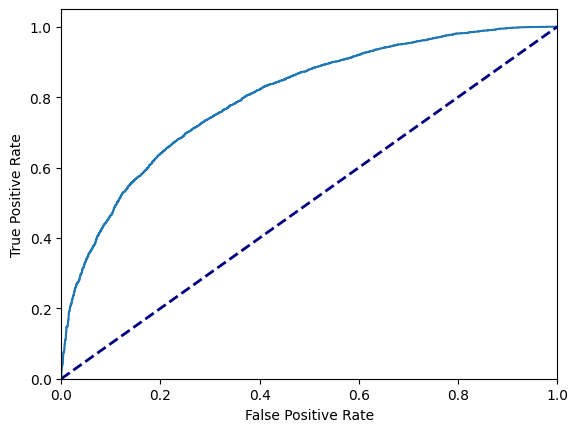

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt  

# split data 80/20 - x are features and y are labels
# https://realpython.com/train-test-split-python-data/
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x, y, test_size=0.2)

# scale features
# fit_transform on first training to learn AND apply transformation, then just transform the test - don't re-learn
scaler = StandardScaler()
x_train_data, x_test_data = scaler.fit_transform(x_train_data), scaler.transform(x_test_data)

# train model
model = HistGradientBoostingClassifier()
model.fit(x_train_data, y_train_data)

model_y_pred = model.predict_proba(x_test_data)[:, 1:]  # get all positive cases

fpr, tpr, _ = metrics.roc_curve(y_test_data, model_y_pred)
print(f"AUC: {metrics.auc(fpr, tpr)}")
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()